In [25]:
import pandas as pd
import numpy as np

# fileName = open(r"D:/Python/毕设实验部分/data/临时特征集/特征集_209维特征_已做特征选择_零填充_已做过采样.csv")
# data = pd.read_csv(fileName)
# data.head()


feature = pd.read_table('/Users/tuyu/000000毕业设计/Flight_Delay/Train_Feature/final_feature.csv',sep=',',encoding='gb2312')

del(feature['本时段离港平均延误时长'])
del(feature['上一时段离港平均延误时长'])
del(feature['航班编号'])
# 1.前序延误 = 前序航班 实际到达时间 - 计划到达时间
# 2.起飞间隔 = 当前航班的计划起飞时间 - 前序航班实际到达时间
feature['起飞间隔'] = feature['起飞间隔'].fillna(0)
feature['前序延误'] = feature['前序延误'].fillna(0)
feature['出发机场天气得分'] = feature['出发机场天气得分'].interpolate()
feature['到达机场天气得分'] = feature['到达机场天气得分'].interpolate()
feature['平均延误时间'] = feature['平均延误时间'].interpolate()
feature['最大延误时间'] = feature['最大延误时间'].interpolate()
feature['延误时间中位数'] = feature['延误时间中位数'].interpolate()
feature['延误时间标准差'] = feature['延误时间标准差'].interpolate()

feature['本时段计划离港航班数'] = feature['本时段计划离港航班数'].fillna(feature['本时段计划离港航班数'].mean())
feature['本时段实际离港航班数'] = feature['本时段实际离港航班数'].fillna(feature['本时段实际离港航班数'].mean())
feature['本时段进港延误时长'] = feature['本时段进港延误时长'].fillna(feature['本时段进港延误时长'].mean())
feature['本时段实际进港延误航班数'] = feature['本时段实际进港延误航班数'].fillna(feature['本时段实际进港延误航班数'].mean())
feature['本时段离港延误时长'] = feature['本时段离港延误时长'].fillna(feature['本时段离港延误时长'].mean())
feature['本时段离港延误率'] = feature['本时段离港延误率'].fillna(feature['本时段离港延误率'].mean())
feature['上一时段进港延误时长'] = feature['上一时段进港延误时长'].fillna(feature['上一时段进港延误时长'].mean())
feature['上一时段离港延误时长'] = feature['上一时段离港延误时长'].fillna(feature['上一时段离港延误时长'].mean())
feature['上一时段实际进港航班数'] = feature['上一时段实际进港航班数'].fillna(feature['上一时段实际进港航班数'].mean())
feature['上一时段进港延误率'] = feature['上一时段进港延误率'].fillna(feature['上一时段进港延误率'].mean())

# feature = feature.sample(frac=0.1, replace=False, random_state=None,axis=0)
# feature0 = feature[feature['标签'] == 0]
# feature0new = feature0.sample(frac=0.15, replace=False, random_state=None,axis=0)
# feature1 = feature[feature['标签'] == 1]
# data = pd.concat([feature0new,feature1],axis=0, ignore_index=True)

feature0 = feature[feature['标签'] == 0]
feature0new = feature0.sample(frac=0.1, replace=False, random_state=None,axis=0)
feature1 = feature[feature['标签'] == 1]


feature0Bayes = feature0new.sample(frac=0.02, replace=False, random_state=None,axis=0)
feature1Bayes = feature1.sample(frac=0.01, replace=False, random_state=None,axis=0)

featureBayes = pd.concat([feature0Bayes,feature1Bayes],axis=0, ignore_index=True)

train = featureBayes

In [26]:
feature0Bayes

,计划起飞时间,计划到达时间,计划起飞时刻,计划到达时刻,计划飞行时间,起飞间隔,前序延误,平均延误时间,最大延误时间,延误时间中位数,...,本时段实际离港航班数,本时段进港延误时长,本时段实际进港延误航班数,本时段离港延误时长,本时段离港延误率,上一时段进港延误时长,上一时段离港延误时长,上一时段实际进港航班数,上一时段进港延误率,标签
5123886,17081,17081,12,13,1.000000,0.633333,0.116667,0.800383,10.000000,0.250000,...,8.0,-0.933333,0.000000,6.400000,0.111111,-1.333333,6.450000,10.000000,0.000000,0
4915681,17100,17100,3,5,1.666667,0.850000,0.233333,0.862857,10.000000,0.216667,...,3.0,-3.331113,0.000000,1.766667,0.000000,-5.342989,0.516667,15.633042,0.020608,0
3252232,16955,16955,1,3,1.833333,0.583333,0.250000,1.067460,10.000000,0.383333,...,10.0,-1.250000,0.257175,0.283333,0.000000,-1.850000,2.531482,15.633042,0.020608,0
5388114,17284,17284,15,17,2.500000,1.633333,-0.633333,0.836539,10.216667,0.333333,...,15.0,3.616667,0.000000,3.866667,0.000000,8.083333,1.266667,21.000000,0.000000,0
2104407,16857,16857,1,3,1.416667,1.316667,-0.483333,0.839002,10.000000,0.183333,...,2.0,-0.116667,0.000000,0.000000,0.000000,4.400000,0.366667,9.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230468,17120,17120,7,9,1.916667,0.933333,-0.183333,0.927239,12.316667,0.366667,...,6.0,-0.950000,0.000000,0.800000,0.000000,-0.733333,0.216667,34.000000,0.000000,0
4154740,17011,17011,4,8,3.166667,1.583333,-0.083333,1.594007,13.950000,0.433333,...,18.0,-2.066667,0.000000,9.683333,0.000000,2.516667,7.666667,5.000000,0.000000,0
336260,17183,17183,3,4,0.916667,1.133333,-0.050000,0.387482,10.000000,0.250000,...,27.0,-0.633333,0.000000,9.583333,0.000000,0.516667,26.333333,1.000000,0.000000,0
3847322,17190,17190,12,13,1.583333,1.250000,-0.083333,0.870604,10.000000,0.300000,...,26.0,-0.150000,0.000000,11.816667,0.000000,1.883333,6.733333,16.000000,0.058824,0


In [27]:
feature1Bayes

,计划起飞时间,计划到达时间,计划起飞时刻,计划到达时刻,计划飞行时间,起飞间隔,前序延误,平均延误时间,最大延误时间,延误时间中位数,...,本时段实际离港航班数,本时段进港延误时长,本时段实际进港延误航班数,本时段离港延误时长,本时段离港延误率,上一时段进港延误时长,上一时段离港延误时长,上一时段实际进港航班数,上一时段进港延误率,标签
2778532,17170,17170,7,10,2.333333,0.000000,10.000000,1.039800,12.450000,0.233333,...,1.000000,10.533333,0.0,-0.100000,0.000000,-5.342989,3.583333,20.0,0.000000,1
185182,17208,17208,5,9,4.583333,0.000000,0.000000,2.590068,10.000000,0.233333,...,1.000000,0.250000,0.0,-0.066667,0.000000,-2.900000,-0.250000,22.0,0.000000,1
7629134,17309,17309,7,9,2.416667,0.850000,-0.100000,1.943224,10.000000,0.816667,...,29.000000,37.716667,2.0,48.016667,0.000000,26.466667,29.016667,22.0,0.000000,1
2567832,16979,16979,11,13,1.666667,-0.966667,-0.366667,0.923869,10.000000,0.250000,...,15.000000,22.750000,1.0,5.633333,0.000000,21.150000,2.416667,25.0,0.000000,1
477556,17061,17061,12,14,1.583333,-1.466667,2.466667,1.743007,11.283333,1.000000,...,13.000000,14.650000,0.0,42.450000,0.000000,-2.733333,39.783333,28.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989296,16974,16974,13,14,1.833333,0.000000,10.000000,0.396545,10.000000,-0.083333,...,15.438519,-0.250000,1.0,1.391369,0.019545,0.733333,2.531482,8.0,0.000000,1
2662476,17015,17015,7,10,2.500000,-0.066667,-0.350000,1.496604,10.000000,0.516667,...,5.000000,4.450000,0.0,9.300000,0.000000,0.716667,7.666667,9.0,0.000000,1
1848749,17125,17125,12,14,2.166667,0.000000,10.000000,0.948586,10.000000,0.333333,...,1.000000,-0.950000,0.0,0.083333,0.000000,-1.650000,0.500000,13.0,0.071429,1
180444,17197,17197,10,13,3.000000,0.000000,0.000000,8.971429,10.000000,10.000000,...,1.000000,-1.416667,0.0,0.033333,0.000000,-8.816667,2.531482,20.0,0.000000,1


Text(0.5, 1.0, 'Learning Rate Distribution')

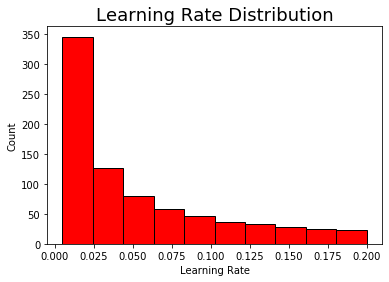

In [28]:
import random
#设置参数空间，有些参数设置成对数分布，
# 比如学习率，因为这类参数都是要累乘才能发挥效果的，一般经验都是写成log分布形式。还有一些参数得在其他参数控制下来进行选择
param_grid = {'class_weight': [None, 'balanced'],
             'boosting_type': ['gbdt', 'goss', 'dart'],
             'num_leaves': list(range(30, 150)),
             'learning_rate': list(np.logspace(np.log(0.005), np.log(0.2), base=np.exp(1), num=800)),
             'subsample_for_bin': list(range(20000, 300000, 20000)),
             'min_child_samples': list(range(20, 500, 5)),
             'reg_alpha': list(np.linspace(0, 1)),
             'reg_lambda': list(np.linspace(0, 1)),
             'colsample_bytree': list(np.linspace(0.6, 1, 10))}
subsample_dist = list(np.linspace(0.5, 1, 100))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 学习率的分布
plt.hist(param_grid['learning_rate'], color = 'r', edgecolor = 'k')
plt.xlabel('Learning Rate'); plt.ylabel('Count'); plt.title('Learning Rate Distribution', size =18)


Text(0.5, 1.0, 'Number of Leaves Distribution')

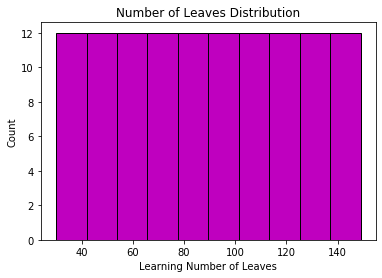

In [29]:
# 叶子数目的分布
plt.hist(param_grid['num_leaves'], color = 'm', edgecolor = 'k')
plt.xlabel('Learning Number of Leaves'); plt.ylabel('Count'); plt.title('Number of Leaves Distribution')


In [30]:
# 参数空间采样
{key: random.sample(value, 2) for key, value in param_grid.items()}

{'class_weight': [None, 'balanced'],
 'boosting_type': ['goss', 'dart'],
 'num_leaves': [50, 130],
 'learning_rate': [0.08242413122080786, 0.017634258807504292],
 'subsample_for_bin': [240000, 60000],
 'min_child_samples': [55, 465],
 'reg_alpha': [0.4897959183673469, 0.6530612244897959],
 'reg_lambda': [0.3061224489795918, 0.36734693877551017],
 'colsample_bytree': [0.9111111111111111, 0.6]}

In [31]:
params = {key: random.sample(value, 1)[0] for key, value in param_grid.items()}
params['subsample'] = random.sample(subsample_dist, 1)[0] if params['boosting_type'] != 'goss' else 1.0
params


{'class_weight': 'balanced',
 'boosting_type': 'gbdt',
 'num_leaves': 109,
 'learning_rate': 0.03097256221321896,
 'subsample_for_bin': 260000,
 'min_child_samples': 335,
 'reg_alpha': 0.5510204081632653,
 'reg_lambda': 0.836734693877551,
 'colsample_bytree': 1.0,
 'subsample': 0.893939393939394}

In [32]:
data = featureBayes
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=7)

train_labels = np.array(train['标签'].astype(np.int32)).reshape((-1,))
test_labels = np.array(test['标签'].astype(np.int32)).reshape((-1,))

train = train.drop(['标签'], axis = 1)
test = test.drop(['标签'], axis = 1)

features = np.array(train)
test_features = np.array(test)
labels = train_labels[:]

print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (15758, 35)
Test shape: (3940, 35)


In [35]:
# 随机优化，交叉验证LightGBM
# Create a lgb dataset
import lightgbm as lgb

train_set = lgb.Dataset(features, label = labels)

r = lgb.cv(params, train_set, num_boost_round=10000, nfold=10, metrics='auc',
          early_stopping_rounds = 80, verbose_eval = False, seed = 42)
# early_stopping_rounds = 80：如果再连续构造80次还是没进步，那就停止

r_best = np.max(r['auc-mean']) # Highest score
r_best_std = r['auc-stdv'][np.argmax(r['auc-mean'])]
# Standard deviation of best score

print('The maximum ROC AUC on the validation set was {:.5f}.'.format(r_best, r_best_std))
print('The ideal numbel of iterations was {}.'.format(np.argmax(r['auc-mean']) + 1))

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3862
[LightGBM] [Info] Number of data points in the train set: 14182, number of used features: 34
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3862
[LightGBM] [Info] Number of data points in the train set: 14182, number of used features: 34
[LightGBM] [Warning] Unknown param

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [37]:
# 保存结果
Max_evals = 200
random_results = pd.DataFrame(columns = ['loss', 'params', 'iteration', 'estimators',
                                        'time'], index = list(range(Max_evals)))


In [38]:
#用AUC指标当做我们的目标
Max_evals = 200
N_folds = 3
def random_objective(params, iteration, n_folds = N_folds):
    start = timer()
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, nfold = n_folds,
                       early_stopping_rounds = 80, metrics = 'auc', seed = 42)
    end = timer()
    best_score = np.max(cv_results['auc-mean'])
    loss = 1 - best_score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)
    return [loss, params, iteration, n_estimators, end-start]


In [40]:
#执行随机调参数
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

random.seed(42)

for i in range(Max_evals):
    params = {key: random.sample(value, 1)[0] for key, value in param_grid.items()}

    if params['boosting_type'] == 'goss':
        params['subsample'] = 1.0
    else:
        params['subsample'] = random.sample(subsample_dist, 1)[0]

    results_list = random_objective(params, i)
    random_results.loc[i, :] = results_list

random_results.sort_values('loss', ascending = True, inplace = True)
random_results.reset_index(inplace = True, drop = True)
random_results.head()


[LightGBM] [Warning] Unknown parameter: class_weight


LightGBMError: Cannot change bin_construct_sample_cnt after constructed Dataset handle.

In [41]:
# Random Search 结果
random_results.loc[0, 'params']


nan

In [42]:
best_random_params = random_results.loc[0, 'params'].copy()
best_random_estimators = int(random_results.loc[0, 'estimators'])
best_random_model = lgb.LGBMClassifier(n_estimators=best_random_estimators, n_jobs=-1,
                                      objective='binary', **best_random_params, random_state=42)
best_random_model.fit(features, labels)
predictions = best_random_model.predict_proba(test_features)[:, 1]

print('The best model from random search scores {:.4f} on the test data.'.format(roc_auc_score(test_labels, predictions)))
print('This was achieved using {} search iterations.'.format(random_results.loc[0, 'iteration']))

AttributeError: 'float' object has no attribute 'copy'

In [ ]:
import lightgbm as lgb
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

train_set = lgb.Dataset(features, label = labels)
N_folds = 3
def objective(params, n_folds = N_folds):
    global ITERATION
    ITERATION += 1
    
    subsample = params['boosting_type'].get('subsample', 1.0)
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
    start = timer()
    cv_results = lgb.cv(params, train_set, num_boost_round=100, nfold=10, metrics='auc',
          early_stopping_rounds = 100, verbose_eval = False, seed = 42)
    run_time = timer() - start
    
    best_score = np.max(cv_results['auc-mean'])
    loss = 1 - best_score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)
    
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, ITERATION, n_estimators, run_time])
    
    return {'loss': loss, 'params': params, 'iteration': ITERATION,
           'estimators': n_estimators, 'train_time': run_time, 'status': STATUS_OK}

In [ ]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample
space = {'class_weight': hp.choice('class_weight', [None, 'balanced']),
        'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)},
                                                    {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                    {'boosting_type': 'goss', 'subsample': 1.0}]),
        'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
         'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
         'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
         'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
         'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)}

In [ ]:
from hyperopt import fmin
from hyperopt import tpe
tpe_algorithm = tpe.suggest

from hyperopt import Trials
bayes_trials = Trials()
out_file = 'gbm_trials.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])
of_connection.close()
# Global variable
global  ITERATION

ITERATION = 0

max_evals = 2
# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = max_evals, trials = bayes_trials, rstate = np.random.RandomState(42))

# Sort the trials with lowest loss (highest AUC) first
bayes_trials_results = sorted(bayes_trials.results, key = lambda x: x['loss'])
bayes_trials_results[0]

In [ ]:
#保存结果
results = pd.read_csv('gbm_trials.csv')
results.sort_values('loss', ascending = True, inplace = True)
results.reset_index(inplace = True, drop = True)
print(results.shape)
results.head()

In [ ]:
import ast
ast.literal_eval(results.loc[0, 'params'])
# 出于安全考虑，对字符串进行类型转换的时候，最好使用ast.literal_eval()函数, 而不是直接用eval()

In [ ]:
best_bayes_estimators = int(results.loc[0, 'estimators'])
best_bayes_params = ast.literal_eval(results.loc[0, 'params']).copy()
best_bayes_model = lgb.LGBMClassifier(n_estimators=best_bayes_estimators, n_jobs=-1,
                                     objective='binary', **best_bayes_params, random_state=42)
best_bayes_model.fit(features, labels)

In [ ]:
import pickle
#保存模型

f= open('/Users/tuyu/000000毕业设计/Flight_Delay/Model/Bayes_model/best_bayes_LightGBM.pickle','wb')
pickle.dump(best_bayes_model,f)
f.close()

In [ ]:
#模型比对

best_random_params['method'] = 'random search'
best_bayes_params['method'] = 'Bayesian optimization'
best_params = pd.DataFrame(best_bayes_params, index = [0]).append(pd.DataFrame(best_random_params, index = [0]), ignore_index = True)
best_params

In [ ]:
random_params = pd.DataFrame(columns = list(random_results.loc[0, 'params'].keys()),
                            index = list(range(len(random_results))))
for i, params in enumerate(random_results['params']):
    random_params.loc[i, :] = list(params.values())
    
random_params['loss'] = random_results['loss']
random_params['iteration'] = random_results['iteration']
random_params.head()


In [ ]:
bayes_params = pd.DataFrame(columns = list(ast.literal_eval(results.loc[0,'params']).keys()),
                           index = list(range(len(results))))
for i, params in enumerate(results['params']):
    bayes_params.loc[i, :] = list(ast.literal_eval(params).values())
    
bayes_params['loss'] = results['loss']
bayes_params['iteration'] = results['iteration']
bayes_params.head()


In [ ]:
plt.figure(figsize = (20, 8))
plt.rcParams['font.size'] = 18

sns.kdeplot(learning_rate_dist, label = 'Sampling Distribution', linewidth = 2)
sns.kdeplot(random_params['learning_rate'], label = 'Random Search', linewidth = 2)
sns.kdeplot(bayes_params['learning_rate'], label = 'Bayes Optimization', linewidth=2)
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Density')
plt.title('Learning Rate Distribution')


In [ ]:
fig, axs = plt.subplots(1, 2, sharey = True, sharex = True)

random_params['boosting_type'].value_counts().plot.bar(ax=axs[0], figsize=(14,6),
                                                      color='orange', title='Random Search Boosting Type')
bayes_params['boosting_type'].value_counts().plot.bar(ax=axs[1], figsize= (14,6),
                                                     color='green', title='Bayes Optimization Boosting Type')


In [ ]:
for i, hyper in enumerate(random_params.columns):
    if hyper not in ['class_weight','boosting_type','iteration','subsample','metric','verbose']:
        plt.figure(figsize = (14, 6))
        if hyper != 'loss':
            sns.kdeplot([sample(space[hyper]) for _ in range(1000)], label = 'Sampling Distribution')
        sns.kdeplot(random_params[hyper], label = 'Random Search')
        sns.kdeplot(bayes_params[hyper], label = 'Bayes Optimization')
        plt.legend(loc = 1)
        plt.title('{} Distribution'.format(hyper))
        plt.xlabel('{}'.format(hyper))
        plt.ylabel('Density')


In [ ]:
bayes_params['boosting_int'] = bayes_params['boosting_type'].replace({'gbdt':1,'goss':2,'dart':3})
plt.plot(bayes_params['iteration'], bayes_params['boosting_int'], 'ro')
plt.yticks([1, 2, 3], ['gdbt', 'goss', 'dart'])
plt.xlabel('Iteration')
plt.title('Boosting Type over Search')


In [ ]:
plt.figure(figsize = (14, 14))
colors = ['red', 'blue', 'orange', 'green']

for i, hyper in enumerate(['colsample_bytree', 'learning_rate', 'min_child_samples', 'num_leaves']):
    plt.subplot(2, 2, i+1)
    sns.regplot('iteration', hyper, data = bayes_params, color = colors[i])
    # plt.xlabel('Iteration')
    # plt.ylabel('{}'.format(hyper))
    plt.title('{} over Search'.format(hyper))
plt.tight_layout()


In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
for i, hyper in enumerate(['reg_alpha', 'reg_lambda', 'subsample_for_bin']):
    sns.regplot('iteration', hyper, data = bayes_params, ax = axes[i])
    axes[i].set(title = '{} over Search'.format(hyper))
plt.tight_layout()


In [ ]:
scores = pd.DataFrame({'ROC AUC': 1 - random_params['loss'],
                       'iteration': random_params['iteration'],
                      'search': 'random'})
scores = scores.append(pd.DataFrame({'ROC AUC': 1 - bayes_params['loss'],
                                    'iteration': bayes_params['iteration'],
                                    'search': 'Bayes'}))
scores['ROC AUC'] = scores['ROC AUC'].astype(np.float32)
scores['iteration'] = scores['iteration'].astype(np.int32)
scores.head()


In [ ]:
scores = pd.DataFrame({'ROC AUC': 1 - random_params['loss'],
                       'iteration': random_params['iteration'],
                      'search': 'random'})
scores = scores.append(pd.DataFrame({'ROC AUC': 1 - bayes_params['loss'],
                                    'iteration': bayes_params['iteration'],
                                    'search': 'Bayes'}))
scores['ROC AUC'] = scores['ROC AUC'].astype(np.float32)
scores['iteration'] = scores['iteration'].astype(np.int32)
scores.head()


In [ ]:
sns.lmplot('iteration', 'ROC AUC', hue = 'search', data = scores, height = 8)
plt.xlabel('Iteration')
plt.ylabel('ROC AUC')
plt.title('ROC AUC versus Iteration')
